# **Creacion del dataset**

## **1. Obteniendo los datos**

Todos los datos que podemos obtener de esta [carpeta de google drive](https://drive.google.com/drive/folders/18_p-jjbYqLmATvOpvKzBmisvfj2j8iVM) 

In [1]:
!mkdir Datos

A subdirectory or file Datos already exists.


In [2]:
import gdown
import zipfile
import os

def descargar_archivos(url, output):
    gdown.download(url, output)
    return 'Done'


def descomprimir(zip_path, output):

    # Abre el archivo ZIP
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extrae todos los archivos del ZIP en la ruta de destino
        zip_ref.extractall(output)

    print('Extracción completada.')

    # Elimina el archivo ZIP
    os.remove(zip_path)

    print('Archivo ZIP eliminado.')

In [4]:
# descargamos el archivo csv
import os

if os.path.isfile('./Datos/labels_dataset1_v2.csv'):
    print('Ya esta descargado')
else:
    url = 'https://drive.google.com/uc?id=1mx6wmgAMzgWKCQ1MqXQOKAthBD7UPelm'
    destination_path = './Datos/labels_dataset1_v2.csv'
    descargar_archivos(url, destination_path)

# descargamos los audios
if os.path.isdir('./Datos/dataset'):
    print("Ya esta descargado")
else:
    url = 'https://drive.google.com/uc?id=1P6qJiBvmohJDV_wpt4g569iDm79Kg_Xs'
    destination_path = './Datos/dataset.zip'
    print(descargar_archivos(url, destination_path))
    zip_path = './Datos/dataset.zip'
    destination_path = './Datos/'
    descomprimir(zip_path, destination_path)


Ya esta descargado
Ya esta descargado


Si alguna de las decargas, descara los archivos manual mente desde el link

In [5]:
!dir /b Datos

dataset
dataset.zip
enfoque2
labels_dataset1_v2.csv
recortados


In [6]:
!dir /b Datos\dataset

012213d40662f86e8f775379bbf94dec.wav
0159af9f3ca04ada46f0c353ac210bb8.wav
02118a932c4940ee09520f26df56f228.wav
0271a0818427d7fae7afde67bf49ba30.wav
035195366b6849c1b339cff8e6de574a.wav
0389792d2f422f25f5d9abd7e7a308d1.wav
03ca49317662c8c6a194cb5ea9704b26.wav
0439cf2661e06729f2f75776c3a85ab8.wav
05bfb21b0e625d91ce591d970ed3b2fe.wav
05dd05d6e17cd86276fbfb82ffa2206a.wav
05e40529898133d90e83ee063832b549.wav
072db9df0bcc285c413ea79885b245c3.wav
074b433130cabcfe842b711c4fed1a5d.wav
079e9f9b77e46b5b1229a5860b69a3ef.wav
083edafa2b1d1f1944018ca7d2e28e97.wav
0841b1843c558dd00ff8246e927ae67a.wav
0876d1160d6082fd93ee78ba7948cf72.wav
08b90d82f21b363400e4c6cf3947a8bf.wav
0a5835b190528603c26d81ee060d7628.wav
0a8c408cd36deb3ba128f4f020f4bb75.wav
0a9defb3df690a7237a0987858248913.wav
0ad60f9a73b7180d4d678c0f58e8fcdb.wav
0bdbfee0862b52849e9448cf51999722.wav
0c3df16e4382c38665d9f8960c61d9d7.wav
0d2c2a06c36b0af46ad3b40b94b56bc6.wav
0d517c4fd29594eb9ccb832b96b76d57.wav
0d77a2ebb554d4dae62911544df3709e.wav
0

## **2. Manipulacion de los datos**

En este apartado lo primero que vamos ha hacer es recortar los audios segun lo que nos diga el archivo .csv

In [7]:
import pandas as pd

# Leemos el csv y lo gurdamos en 'df'
df = pd.read_csv('./Datos/labels_dataset1_v2.csv')

df

,path,start,duration,end,label
0,012213d40662f86e8f775379bbf94dec,61.186,2.500,63.686,whistle
1,0159af9f3ca04ada46f0c353ac210bb8,76.260,17.000,93.260,cetaceans_allfreq
2,0159af9f3ca04ada46f0c353ac210bb8,161.482,1.000,162.482,click
3,0271a0818427d7fae7afde67bf49ba30,91.563,1.000,92.563,click
4,0271a0818427d7fae7afde67bf49ba30,125.627,1.316,126.943,click
...,...,...,...,...,...
5454,fef848be302d46d050f01a51bfd44bed,179.556,0.600,180.156,whistle
5455,fffd313598e3dd482c75d8c06db8d059,65.394,7.400,72.794,cetaceans_allfreq
5456,fffd313598e3dd482c75d8c06db8d059,196.394,0.500,196.894,whistle
5457,fffd313598e3dd482c75d8c06db8d059,256.394,0.400,256.794,whistle


**Creamos las carpetas necesarias**

In [8]:
!mkdir Datos\recortados

A subdirectory or file Datos\recortados already exists.


In [9]:
!mkdir Datos\recortados\whistle
!mkdir Datos\recortados\cetaceans_allfreq
!mkdir Datos\recortados\click
!mkdir Datos\recortados\volcano
!mkdir Datos\recortados\allfreq

A subdirectory or file Datos\recortados\whistle already exists.
A subdirectory or file Datos\recortados\cetaceans_allfreq already exists.
A subdirectory or file Datos\recortados\click already exists.
A subdirectory or file Datos\recortados\volcano already exists.
A subdirectory or file Datos\recortados\allfreq already exists.


In [10]:
import os
from pydub import AudioSegment
from tqdm import tqdm

ruta_carpeta = './Datos/dataset/'

archivos = os.listdir(ruta_carpeta)

for archivo in tqdm(archivos):
    # obtenemos el nombre del archivo
    nombre, _ = os.path.splitext(os.path.basename(archivo))
    for i in df[df['path'] == nombre].index.tolist():
        label = df.loc[i]['label']
        start = df.loc[i]['start']*1000 #
        end = df.loc[i]['end']*1000

        # definir la ruta del archivo
        ruta_archivo = ruta_carpeta+archivo

        # cargar el archivo de audio original
        audio = AudioSegment.from_file(ruta_archivo, format="wav")

        # recortar el segmento deseado
        audio_recortado = audio[start:end]

        # definir la ruta del archivo de audio recortado y exportarlo
        ruta_archivo_recortado = f"./Datos/recortados/{label}/{nombre}_{i}.wav"
        audio_recortado.export(ruta_archivo_recortado, format="wav")


c:\Users\madre\miniconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
100%|██████████| 558/558 [01:22<00:00,  6.77it/s]


**Visualizando los audios en forama de espectograma**

./Datos/recortados/whistle
Archivo aleatorio seleccionado: 4d36ce0f7152b24ff39cf4ab3a9ac476_1621.wav


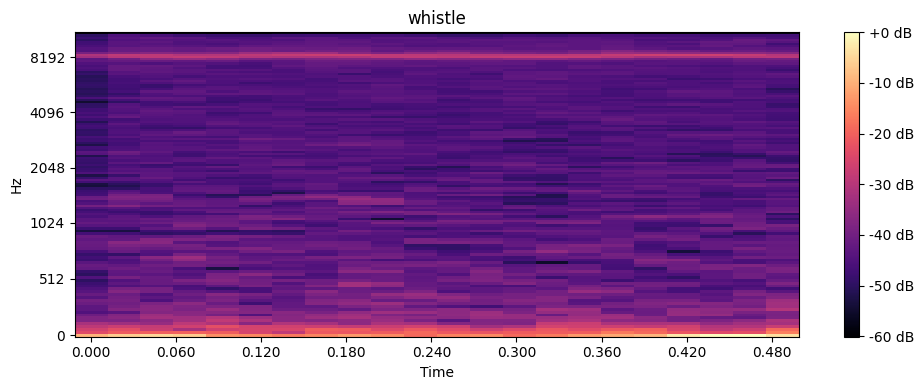

./Datos/recortados/cetaceans_allfreq
Archivo aleatorio seleccionado: a7bdf77cc81bcacd372bd7f56d179fee_3829.wav


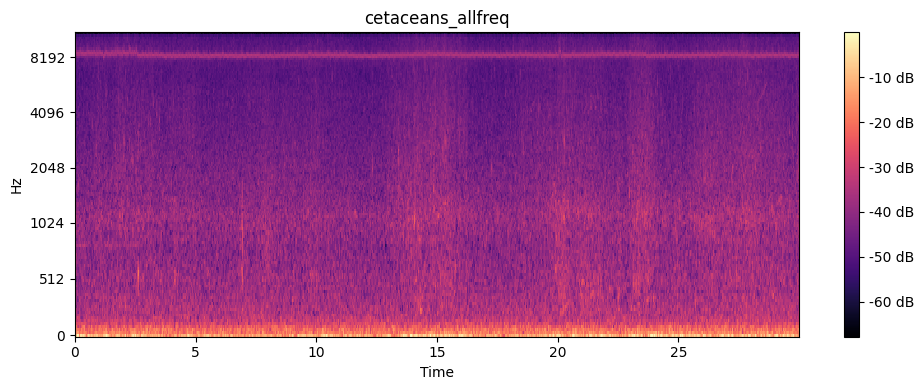

./Datos/recortados/click
Archivo aleatorio seleccionado: 072db9df0bcc285c413ea79885b245c3_140.wav


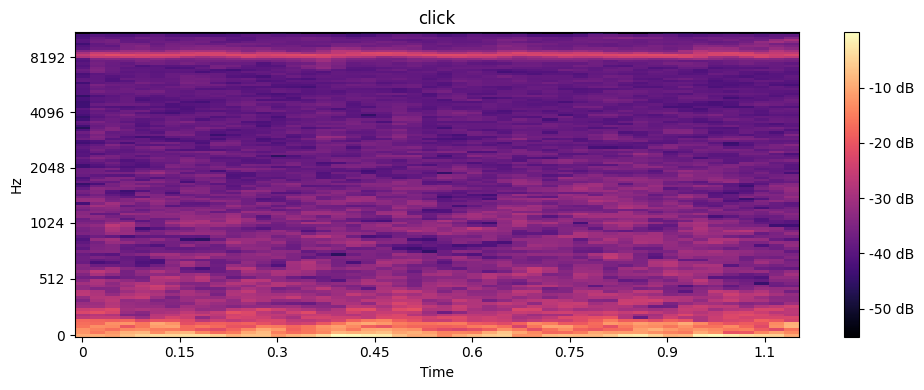

./Datos/recortados/volcano
Archivo aleatorio seleccionado: 6e2bb62882cf394e78c1d097d6304d16_2439.wav


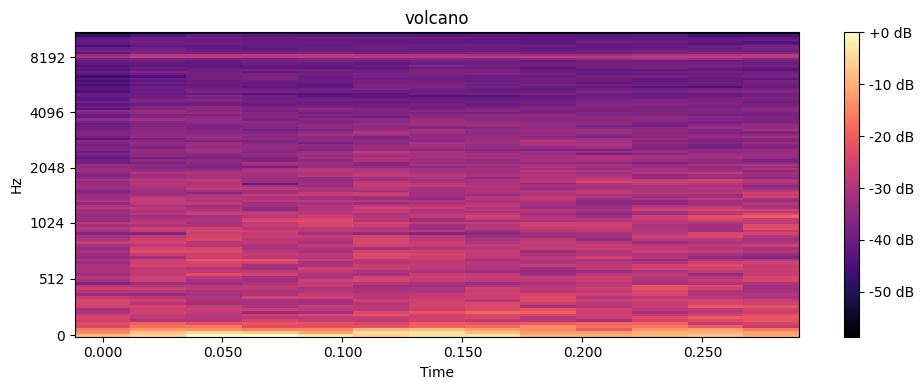

./Datos/recortados/allfreq
Archivo aleatorio seleccionado: 262aa20c6a2f1292750f785486bfb98f_795.wav


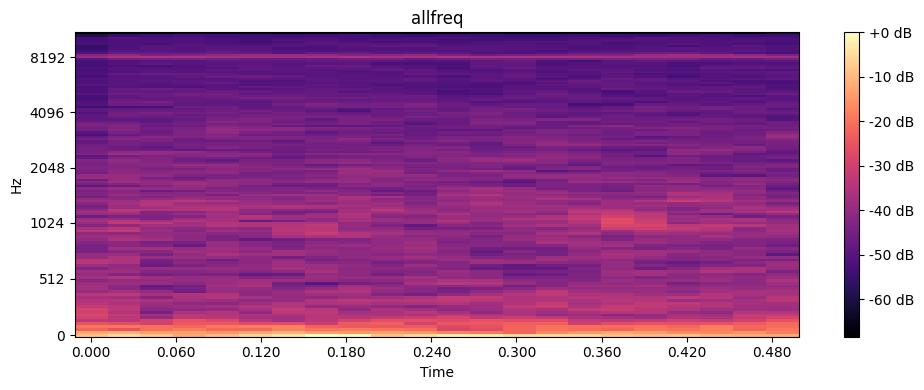

In [11]:
import os
import random
import librosa
import matplotlib.pyplot as plt
import numpy as np

directorio = f'./Datos/recortados/'

for label in df['label'].unique().tolist():
    # Ruta del directorio que contiene los archivos

    ruta = os.path.join(directorio, label)
    print(ruta)
    # Obtener lista de archivos en el directorio
    archivos = os.listdir(ruta)

    # Seleccionar un archivo aleatorio
    archivo_aleatorio = random.choice(archivos)

    # Imprimir el nombre del archivo aleatorio seleccionado
    print("Archivo aleatorio seleccionado:", archivo_aleatorio)

    audio_path = os.path.join(ruta, archivo_aleatorio)
    y, sr = librosa.load(audio_path)
    # Calcular espectrograma
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    # Mostramos la imagen
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, sr=sr,
                             x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(label)
    plt.tight_layout()
    plt.show()


## **3. Creacion de los datasets**

### **3.1. Primer enfoque - Coeficientes Cepstrales de Frecuencia de Mel  (MFCC)**

In [12]:
!mkdir Datos\enfoque1

In [13]:
from tqdm import tqdm

# Ruta al directorio que contiene los archivos de audio
path = './Datos/recortados/'  

# Función para extraer características de un archivo de audio
def features_extract(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')  # Cargamos el archivo de audio
    feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)  # Calculamos características de MFCC
    scaled_feature = np.mean(feature.T, axis=0)  # Escalamos las características tomando la media
    return scaled_feature

extracted = []  # Lista para almacenar las características extraídas

# Iteramos sobre las etiquetas únicas en la columna 'label' de un DataFrame (df)
for label in df['label'].unique().tolist():
    archivos = os.listdir(os.path.join(path, label))  # Obtenemos una lista de archivos en el subdirectorio correspondiente a la etiqueta
    for archivo in tqdm(archivos):  # Iteramos sobre cada archivo con una barra de progreso
        data = features_extract(os.path.join(path, label, archivo))  # Extraemos características del archivo de audio
        extracted.append([data, label])  # Agregamos las características extraídas junto con la etiqueta a la lista 'extracted'

 29%|██▊       | 596/2077 [00:10<00:17, 82.99it/s]c:\Users\madre\miniconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1764
  warnings.warn(
 96%|█████████▌| 1987/2077 [00:37<00:01, 75.00it/s]c:\Users\madre\miniconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1588
  warnings.warn(
100%|██████████| 23/23 [00:07<00:00,  3.07it/s]


In [14]:
MFCC_df = pd.DataFrame(extracted,columns=['feature','label'])
MFCC_df

,feature,label
0,"[-655.03894, 63.1695, 10.757038, 21.136215, 4....",whistle
1,"[-578.7469, 81.91728, -10.924023, 11.23446, -4...",whistle
2,"[-567.00964, 82.101105, -14.731988, 12.733934,...",whistle
3,"[-576.83685, 77.57335, -15.542832, 14.319379, ...",whistle
4,"[-557.8747, 78.30917, -13.749625, 16.721146, -...",whistle
...,...,...
5454,"[-562.69415, 70.66823, -6.884647, 23.808416, -...",allfreq
5455,"[-546.1909, 69.080666, -14.523592, 22.163635, ...",allfreq
5456,"[-586.30975, 74.10078, -6.768806, 26.699821, 1...",allfreq
5457,"[-585.0476, 75.75177, -2.8806534, 26.33029, 3....",allfreq


In [15]:
MFCC_df.to_csv('./Datos/enfoque1/dataframe.csv')

### **3.2. Segundo enfoque - Imagens de espectograma**

In [16]:
!mkdir Datos\enfoque2

A subdirectory or file Datos\enfoque2 already exists.


In [17]:
!mkdir Datos\enfoque2\whistle
!mkdir Datos\enfoque2\cetaceans_allfreq
!mkdir Datos\enfoque2\click
!mkdir Datos\enfoque2\volcano
!mkdir Datos\enfoque2\allfreq

A subdirectory or file Datos\enfoque2\whistle already exists.
A subdirectory or file Datos\enfoque2\cetaceans_allfreq already exists.
A subdirectory or file Datos\enfoque2\click already exists.
A subdirectory or file Datos\enfoque2\volcano already exists.
A subdirectory or file Datos\enfoque2\allfreq already exists.


In [18]:
import wave
import pylab

def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [19]:
# Ruta al directorio que contiene los archivos de audio
path = './Datos/recortados/'  
exit = './Datos/enfoque2/'

for label in df['label'].unique().tolist():
    archivos = os.listdir(os.path.join(path, label))  # Obtenemos una lista de archivos en el subdirectorio correspondiente a la etiqueta
    for archivo in tqdm(archivos):
        sound_info, frame_rate = get_wav_info(os.path.join(path, label, archivo))
        nombre_sin_extension = os.path.splitext(archivo)[0]
        pylab.specgram(sound_info, Fs=frame_rate)
        pylab.savefig(os.path.join(exit, label, f'{nombre_sin_extension}.png'))
        pylab.close()

 42%|████▏     | 1221/2879 [02:53<03:42,  7.46it/s]c:\Users\madre\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
100%|██████████| 23/23 [00:11<00:00,  1.98it/s]
